<a href="https://colab.research.google.com/github/HerminioSabino/Python_DataSet/blob/master/Eleicao2020_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Rotina para análise da lista de candidatos na eleição 2020 no Rio Grande do Norte

### importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
### Adicionando o dataset e selecionando apenas as colunas desejadas
df = pd.read_csv("https://raw.githubusercontent.com/HerminioSabino/Python_DataSet/master/Dataset/lista_de_candidatos_-_candidaturas.csv", sep=";",encoding="latin-1")
##df = df[['Cargo','Nome do candidato (urna)']]
df.columns

Index(['UF', 'Município', 'Partido', 'Número do candidato',
       'Nome do candidato', 'Nome do candidato (urna)', 'Cargo',
       'Situação da candidatura', 'Detalhe situação candidatura',
       'Data eleição', 'Situação de totalização', 'Unnamed: 11'],
      dtype='object')

In [51]:
### Selecionar as colunas necessárias e fazer o filtro apenas para o cargo de vereador
vereadores = df[['Número do candidato','Cargo','Partido','Nome do candidato', 'Nome do candidato (urna)']]
vereadores = pd.DataFrame(vereadores[vereadores.Cargo == "Vereador"])
vereadores.columns = ['Numero_candidato', 'Cargo', 'Partido', 'Nome_candidato','Nome_na_urna']

In [ ]:
## Transformar o número do candidato em string para usar funções srt
vereadores['Numero_candidato'] = vereadores['Numero_candidato'].astype('string')
vereadores


In [123]:
## FAZER O FILTRO COM AS PATENTES (O RESULTADO SERÁ UMA LISTA COM OS TOTAL DE OCORRÊNCIA DE CADA FILTRO)
data = [sum(vereadores['Nome_na_urna'].str.contains('SARGENTO')),
        sum(vereadores['Nome_na_urna'].str.contains('CAPITÃO')),
        sum(vereadores['Nome_na_urna'].str.contains('MAJOR')),
        sum(vereadores['Nome_na_urna'].str.contains('CABO')),
        sum(vereadores['Nome_na_urna'].str.contains('POLICIAL')),
        sum(vereadores['Nome_na_urna'].str.contains('TENENTE'))]


In [ ]:
### CRIAR O DATAFRAME COM OS RESULTADO DO PROCEDIMENTO PASSADO
colunas = ['Cargo', 'Valor'] ## NOME DAS COLUNAS
filtros = ['SARGENTO','CAPITÃO','MAJOR','CABO','POLICIAL','TENENTE'] ## NOME DOS FILTROS 
base = pd.DataFrame(columns=colunas)
base['Valor'] = data 
base['Cargo'] = filtros
base

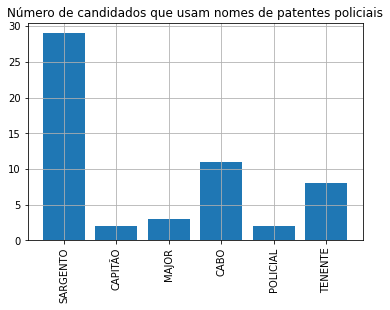

In [126]:
plt.bar(base['Cargo'], base['Valor'])
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Número de candidados que usam nomes de patentes policiais")
plt.show()

In [ ]:
#### Filtrar número com '666' e agrupar por partido
ver = vereadores[vereadores['Número do candidato'].str.contains('666')]
ver_g = ver.groupby(['Partido']).size().reset_index(name='counts')
ver_g.columns = ['Partido', 'Valor']
ver_g

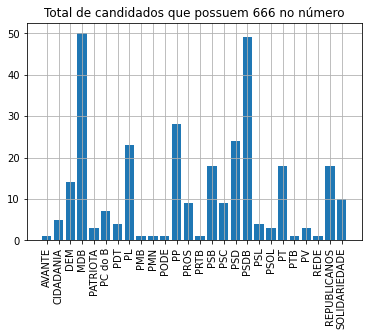

In [34]:
### Plotar o gráfico com os partidos que possuem candidatos com 666
a = ver_g['Partido']
p = ver_g['Valor']
plt.bar(a,p)
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Total de candidados que possuem 666 no número")
plt.show()

In [ ]:
## conta a quantidade de candidatos que possuem "IRMÃO" no nome (fantásia)
irmao = pd.DataFrame(vereadores[vereadores['Nome do candidato (urna)'].str.contains('IRMÃO')])
ver_irmao = irmao.groupby(['Partido']).size().reset_index(name='counts')
ver_irmao

In [ ]:
### Gráfico com o total de candidatos com IRMÃO no nome na URNA
plt.bar(ver_irmao['Partido'], ver_irmao['counts'])
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Total de candidados que possuem 'IRMÃO' no nome (urna)")
plt.show()